In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [2]:
##importing data sets

appdata=pd.read_csv("application_data.csv")
appdata.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
## Getting shapes of both data sets

print(appdata.shape)


(307511, 122)


In [4]:
# Lets analyse application data set first
# Finding out columns with null values grater than 50% 

colswithmorethan50=[]
for i in appdata.columns:
    if ((appdata["{}".format(i)].isnull().sum()/len(appdata)*100)>50):
        colswithmorethan50.append(i)

In [5]:
print(colswithmorethan50)

['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE']


In [6]:
len(colswithmorethan50)

41

In [7]:
##Dropping the above columns 
appdata_new=appdata.drop(colswithmorethan50,axis=1)

In [8]:
appdata_new.shape

(307511, 81)

In [9]:
##checking again

colswithmorethan50new=[]
for i in appdata_new.columns:
    if ((appdata_new["{}".format(i)].isnull().sum()/len(appdata_new)*100)>50):
        colswithmorethan50new.append(i)
print(colswithmorethan50new)

[]


Now we have columns which contains null values below 50%.
We now have 81 columns out of which we will find out the needed columns only.


In [10]:
appdata_new_frame=appdata_new[["SK_ID_CURR", "TARGET", "NAME_CONTRACT_TYPE" , "CODE_GENDER",
  "FLAG_OWN_CAR" , "FLAG_OWN_REALTY" , "CNT_CHILDREN" , "AMT_INCOME_TOTAL" ,
  "AMT_CREDIT" ,"AMT_ANNUITY" , "AMT_GOODS_PRICE" ,"NAME_TYPE_SUITE","NAME_INCOME_TYPE" ,
  "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS" ,"DAYS_BIRTH","DAYS_EMPLOYED", "NAME_HOUSING_TYPE" ,
  "FLAG_MOBIL" ,"FLAG_EMAIL" ,"OCCUPATION_TYPE" ,"HOUR_APPR_PROCESS_START","REG_REGION_NOT_LIVE_REGION","DEF_30_CNT_SOCIAL_CIRCLE","DEF_60_CNT_SOCIAL_CIRCLE",
  "AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_YEAR"]]

In [11]:
appdata_new_frame.shape

(307511, 28)

In [12]:
## counting null values percentage again

appdata_new_frame.isnull().sum()/len(appdata_new_frame)*100



SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
NAME_TYPE_SUITE                0.420148
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
NAME_HOUSING_TYPE              0.000000
FLAG_MOBIL                     0.000000
FLAG_EMAIL                     0.000000
OCCUPATION_TYPE               31.345545
HOUR_APPR_PROCESS_START        0.000000
REG_REGION_NOT_LIVE_REGION     0.000000
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021


In [13]:
appdata_new_frame.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                      12
AMT_GOODS_PRICE                 278
NAME_TYPE_SUITE                1292
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
NAME_HOUSING_TYPE                 0
FLAG_MOBIL                        0
FLAG_EMAIL                        0
OCCUPATION_TYPE               96391
HOUR_APPR_PROCESS_START           0
REG_REGION_NOT_LIVE_REGION        0
DEF_30_CNT_SOCIAL_CIRCLE       1021
DEF_60_CNT_SOCIAL_CIRCLE       1021
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_YEAR  

In [14]:
## Getting info on numerical columns present in the new dataframe

appdata_new_frame.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_EMAIL,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,306490.000000,306490.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,-16036.995067,63815.045904,0.999997,0.056720,12.063419,0.015144,0.143421,0.100049,0.007000,0.267395,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,4363.988632,141275.766519,0.001803,0.231307,3.265832,0.122126,0.446698,0.362291,0.110757,0.916002,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,-25229.000000,-17912.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,-19682.000000,-2760.000000,1.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,-15750.000000,-1213.000000,1.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,-12413.000000,-289.000000,1.000000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,-7489.000000,365243.000000,1.000000,1.000000,23.000000,1.000000,34.000000,24.000000,9.000000,27.000000,25.000000


From the above we can see that we have combination of both continuous and categorical variables.
And some of the variables have negative values

In [15]:
appdata_new_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  307511 non-null  int64  
 1   TARGET                      307511 non-null  int64  
 2   NAME_CONTRACT_TYPE          307511 non-null  object 
 3   CODE_GENDER                 307511 non-null  object 
 4   FLAG_OWN_CAR                307511 non-null  object 
 5   FLAG_OWN_REALTY             307511 non-null  object 
 6   CNT_CHILDREN                307511 non-null  int64  
 7   AMT_INCOME_TOTAL            307511 non-null  float64
 8   AMT_CREDIT                  307511 non-null  float64
 9   AMT_ANNUITY                 307499 non-null  float64
 10  AMT_GOODS_PRICE             307233 non-null  float64
 11  NAME_TYPE_SUITE             306219 non-null  object 
 12  NAME_INCOME_TYPE            307511 non-null  object 
 13  NAME_EDUCATION

In [16]:
appdata_new_frame.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_MOBIL,FLAG_EMAIL,OCCUPATION_TYPE,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,1,0,Laborers,10,0,2.0,2.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,1,0,Core staff,11,0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,1,0,Laborers,9,0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,1,0,Laborers,17,0,0.0,0.0,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,1,0,Core staff,11,0,0.0,0.0,0.0,0.0,0.0


Data type of variables look proper

In [17]:
##Looking throught the columns one by one

In [18]:
appdata_new_frame.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                      12
AMT_GOODS_PRICE                 278
NAME_TYPE_SUITE                1292
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
NAME_HOUSING_TYPE                 0
FLAG_MOBIL                        0
FLAG_EMAIL                        0
OCCUPATION_TYPE               96391
HOUR_APPR_PROCESS_START           0
REG_REGION_NOT_LIVE_REGION        0
DEF_30_CNT_SOCIAL_CIRCLE       1021
DEF_60_CNT_SOCIAL_CIRCLE       1021
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_YEAR  

In [19]:
# AMT_ANNUITY has 12 null values

appdata_new_frame["AMT_ANNUITY"].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

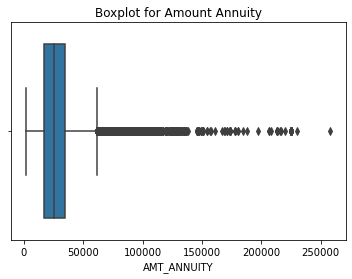

In [20]:
# Lets check the distribution using box plot

sns.boxplot(appdata_new_frame["AMT_ANNUITY"])
plt.title("Boxplot for Amount Annuity")
plt.show()

As we saw above we had 12 null values and the boxplot indicates that there is an outlier. We can impute null values with median here in order to avoid bias

In [21]:
##Filling the null values with median value

appdata_new_frame["AMT_ANNUITY"]=appdata_new_frame["AMT_ANNUITY"].fillna(appdata_new_frame["AMT_ANNUITY"].median())

In [22]:
appdata_new_frame["AMT_ANNUITY"].isnull().sum()

0

In [23]:
## AMT_INCOME_TOTAL

print(appdata_new_frame["AMT_INCOME_TOTAL"].isnull().sum())

0


In [24]:
appdata_new_frame["AMT_INCOME_TOTAL"].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

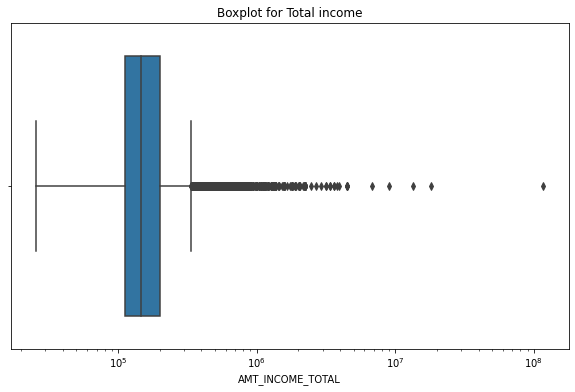

In [25]:
plt.figure(figsize=[10,6])

sns.boxplot(appdata_new_frame["AMT_INCOME_TOTAL"])
plt.xscale("log")
plt.title("Boxplot for Total income")
plt.show()

In [26]:
appdata_new_frame["AMT_INCOME_TOTAL"].quantile([0.5, 0.7, 0.9,0.95,0.99])

0.50    147150.0
0.70    180000.0
0.90    270000.0
0.95    337500.0
0.99    472500.0
Name: AMT_INCOME_TOTAL, dtype: float64

There are outliers in Total income as the income varies for all the customers. We can cap the outliers

In [27]:
# AMT_CREDIT

appdata_new_frame["AMT_CREDIT"].describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

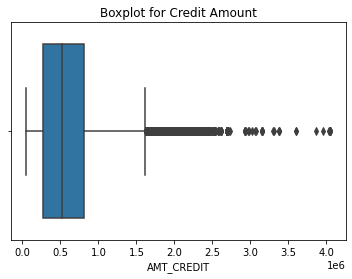

In [28]:
sns.boxplot(appdata_new_frame["AMT_CREDIT"])
plt.title("Boxplot for Credit Amount")
plt.show()

Credit Amount also varies from person to person

In [29]:
## Lets check DAYS_BIRTH and DAYS_EMPLOYED columns
## As we saw earlier , there are some negative values present in these columns

appdata_new_frame["DAYS_BIRTH"]=abs(appdata_new_frame["DAYS_BIRTH"])

In [30]:
appdata_new_frame["DAYS_EMPLOYED"]=abs(appdata_new_frame["DAYS_EMPLOYED"])

In [31]:
appdata_new_frame[["DAYS_BIRTH","DAYS_EMPLOYED"]].describe()

,DAYS_BIRTH,DAYS_EMPLOYED
count,307511.000000,307511.000000
mean,16036.995067,67724.742149
std,4363.988632,139443.751806
min,7489.000000,0.000000
25%,12413.000000,933.000000
50%,15750.000000,2219.000000
75%,19682.000000,5707.000000
max,25229.000000,365243.000000


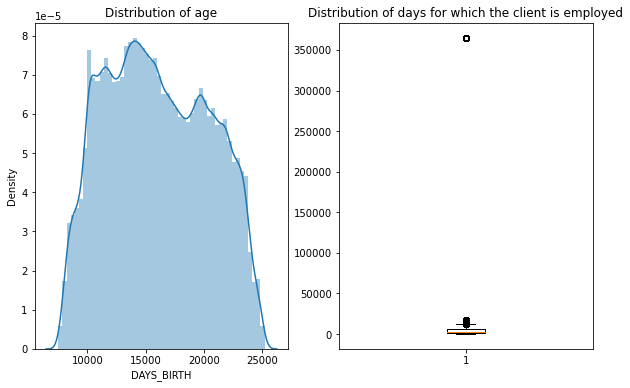

In [32]:
plt.figure(figsize=[10,6])

plt.subplot(1,2,1)
sns.distplot(appdata_new_frame["DAYS_BIRTH"])
plt.title("Distribution of age")

plt.subplot(1,2,2)
plt.boxplot(appdata_new_frame["DAYS_EMPLOYED"])
plt.title("Distribution of days for which the client is employed")
plt.show()

There were no null values for both the columns
1.The age group of the customers are mostly in the same range
2.There is an outlier in the DAYS_EMPLOYED column as there will be some people who have more experience than others

In [33]:
##Checking Target Variable:

appdata_new_frame["TARGET"].value_counts()


0    282686
1     24825
Name: TARGET, dtype: int64

In [34]:
#in percentage 
appdata_new_frame["TARGET"].value_counts(normalize=True)*100


0    91.927118
1     8.072882
Name: TARGET, dtype: float64

91.9% of people are paying the installments on time whereas 8.07% of people are having difficulties.

In [35]:
appdata_new_frame["CODE_GENDER"].value_counts(normalize=True)*100
#print(appdata_new_frame["CODE_GENDER"].isnull().sum())

F      65.834393
M      34.164306
XNA     0.001301
Name: CODE_GENDER, dtype: float64

 As compared to males , females have applied more for the loans 

In [36]:
#Looking at all the available columns to see if we can do analysis on any other columns

print(appdata_new_frame.columns,end="")

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [37]:
#Analysis on NAME_TYPE_SUITE , NAME_EDUCATION_TYPE 
#Lets check for null values first 

appdata_new_frame["NAME_TYPE_SUITE"].isnull().sum()


1292

In [38]:
appdata_new_frame["NAME_EDUCATION_TYPE"].isnull().sum()


0

In [39]:
len(appdata_new_frame)

307511

In [40]:
# Percentage of missing values 
print(appdata_new_frame["NAME_TYPE_SUITE"].isnull().sum() /len(appdata_new_frame)*100)

0.42014757195677555


In [41]:
appdata_new_frame["NAME_TYPE_SUITE"].value_counts(normalize=True)

Unaccompanied      0.811596
Family             0.131112
Spouse, partner    0.037130
Children           0.010669
Other_B            0.005780
Other_A            0.002828
Group of people    0.000885
Name: NAME_TYPE_SUITE, dtype: float64

In [42]:
appdata_new_frame.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                       0
AMT_GOODS_PRICE                 278
NAME_TYPE_SUITE                1292
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
NAME_HOUSING_TYPE                 0
FLAG_MOBIL                        0
FLAG_EMAIL                        0
OCCUPATION_TYPE               96391
HOUR_APPR_PROCESS_START           0
REG_REGION_NOT_LIVE_REGION        0
DEF_30_CNT_SOCIAL_CIRCLE       1021
DEF_60_CNT_SOCIAL_CIRCLE       1021
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_YEAR  

In [43]:
#Filling the null values with mode 

appdata_new_frame["NAME_TYPE_SUITE"]=appdata_new_frame["NAME_TYPE_SUITE"].fillna("Unaccompanied")

In [44]:
#checking again
appdata_new_frame.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                       0
AMT_GOODS_PRICE                 278
NAME_TYPE_SUITE                   0
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
NAME_HOUSING_TYPE                 0
FLAG_MOBIL                        0
FLAG_EMAIL                        0
OCCUPATION_TYPE               96391
HOUR_APPR_PROCESS_START           0
REG_REGION_NOT_LIVE_REGION        0
DEF_30_CNT_SOCIAL_CIRCLE       1021
DEF_60_CNT_SOCIAL_CIRCLE       1021
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_YEAR  

In [45]:
appdata_new_frame.shape

(307511, 28)

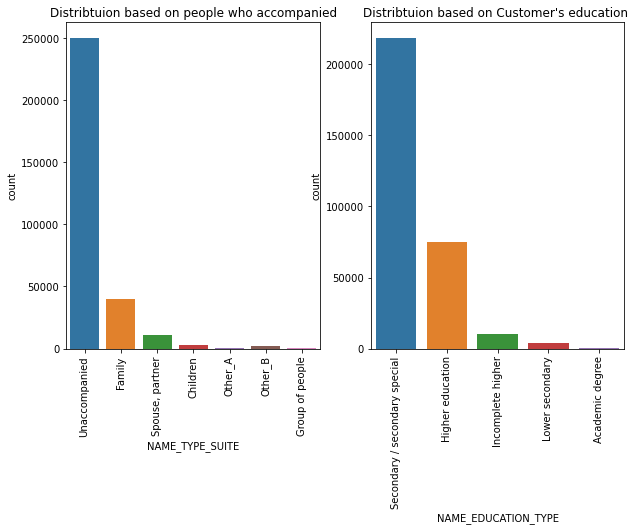

In [46]:
#Plots on NAME_TYPE_SUITE , NAME_EDUCATION_TYPE 

plt.figure(figsize=[10,6])

plt.subplot(1,2,1)
sns.countplot(appdata_new_frame["NAME_TYPE_SUITE"])
plt.xticks(rotation=90)
plt.title("Distribtuion based on people who accompanied")


plt.subplot(1,2,2)
sns.countplot(appdata_new_frame["NAME_EDUCATION_TYPE"])
plt.xticks(rotation=90)
plt.title("Distribtuion based on Customer's education ")
plt.show()


Most of the customers came alone to apply the loan and majority of the loan applcation were submitted by people with Secondary education.

<AxesSubplot:>

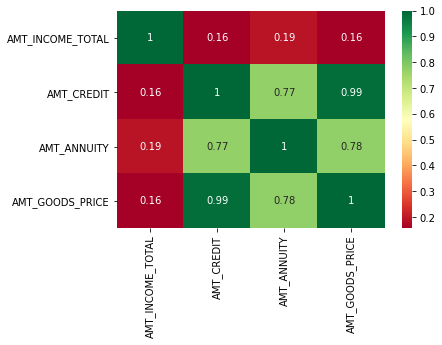

In [47]:
sns.heatmap(appdata_new_frame[["AMT_INCOME_TOTAL","AMT_CREDIT", "AMT_ANNUITY","AMT_GOODS_PRICE"]].corr() , cmap="RdYlGn" ,annot=True)

There is a high correaltion between CREDIT AND GOOD PRICE, we can use either of them

In [48]:
## Binning continuous data

In [49]:
print(appdata_new_frame.columns,end="")

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [50]:
appdata_new_frame["AMT_INCOME_TOTAL"].max()

117000000.0

In [51]:
appdata_new_frame["AMT_INCOME_TOTAL"].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [52]:
# Binning for AMT_INCOME_TOTAL

appdata_new_frame["Income_Range"]=pd.cut(appdata_new_frame["AMT_INCOME_TOTAL"],bins=[0,200000,400000,1000000000] ,labels=["Low","Medium","High"] )

In [53]:
appdata_new_frame["Income_Range"].head(10)

0    Medium
1    Medium
2       Low
3       Low
4       Low
5       Low
6       Low
7    Medium
8       Low
9       Low
Name: Income_Range, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

In [54]:
appdata_new_frame.shape

(307511, 29)

In [55]:
##Binning AMT_CREDIT

appdata_new_frame["AMT_CREDIT"].describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [56]:
appdata_new_frame["AMT_Credit_Range"]=pd.cut(appdata_new_frame["AMT_CREDIT"],bins=[0,400000,800000,1000000000] ,labels=["Low","Medium","High"] )

In [57]:
appdata_new_frame.shape

(307511, 30)

In [58]:
##Finding age groups

appdata_new_frame["Age_Group"]=pd.cut(appdata_new_frame["DAYS_BIRTH"],bins=[0,7300,10950,14600,18250,21900,25500] ,labels=['0-20','20-30','30-40','40-50','50-60','60-70'] )

##The values are taken by multiplying age groups by 365 and then added 3650

In [59]:
appdata_new_frame.shape

(307511, 31)

In [60]:
appdata_new_frame["Age_Group"]

0         20-30
1         40-50
2         50-60
3         50-60
4         50-60
          ...  
307506    20-30
307507    50-60
307508    40-50
307509    30-40
307510    40-50
Name: Age_Group, Length: 307511, dtype: category
Categories (6, object): ['0-20' < '20-30' < '30-40' < '40-50' < '50-60' < '60-70']

In [61]:
appdata_new_frame.shape

(307511, 31)

In [62]:
appdata_new_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 31 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   SK_ID_CURR                  307511 non-null  int64   
 1   TARGET                      307511 non-null  int64   
 2   NAME_CONTRACT_TYPE          307511 non-null  object  
 3   CODE_GENDER                 307511 non-null  object  
 4   FLAG_OWN_CAR                307511 non-null  object  
 5   FLAG_OWN_REALTY             307511 non-null  object  
 6   CNT_CHILDREN                307511 non-null  int64   
 7   AMT_INCOME_TOTAL            307511 non-null  float64 
 8   AMT_CREDIT                  307511 non-null  float64 
 9   AMT_ANNUITY                 307511 non-null  float64 
 10  AMT_GOODS_PRICE             307233 non-null  float64 
 11  NAME_TYPE_SUITE             307511 non-null  object  
 12  NAME_INCOME_TYPE            307511 non-null  object  
 13 

In [63]:
# As we know that the target variable has only 2 values 0 and 1 ,lets divide the data frame according to it

df0=appdata_new_frame[appdata_new_frame["TARGET"]==0]

In [64]:
df0.shape

(282686, 31)

In [65]:
df1=appdata_new_frame[appdata_new_frame["TARGET"]==1]

In [66]:
df1.shape

(24825, 31)

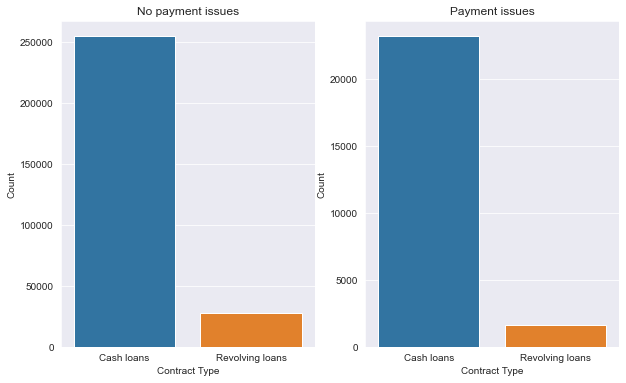

In [67]:
## We now have two different dataframe with the added columns which were binned/bucketed using existing data

#Identifying loans using NAME_CONTRACT_TYPE

plt.figure(figsize=[10,6])

sns.set_style("darkgrid")
plt.subplot(1,2,1)
sns.countplot(df0["NAME_CONTRACT_TYPE"])
plt.xlabel("Contract Type")
plt.ylabel("Count")
plt.title("No payment issues")

plt.subplot(1,2,2)
sns.countplot(df1["NAME_CONTRACT_TYPE"])
plt.xlabel("Contract Type")
plt.ylabel("Count")
plt.title("Payment issues")

plt.show()



In [68]:
df0["NAME_CONTRACT_TYPE"].value_counts()/len(df0)*100

Cash loans         90.209986
Revolving loans     9.790014
Name: NAME_CONTRACT_TYPE, dtype: float64

In [69]:
df1["NAME_CONTRACT_TYPE"].value_counts()/len(df1)*100

Cash loans         93.538771
Revolving loans     6.461229
Name: NAME_CONTRACT_TYPE, dtype: float64

There is not such inference which can be made just looking at counts of type of loans

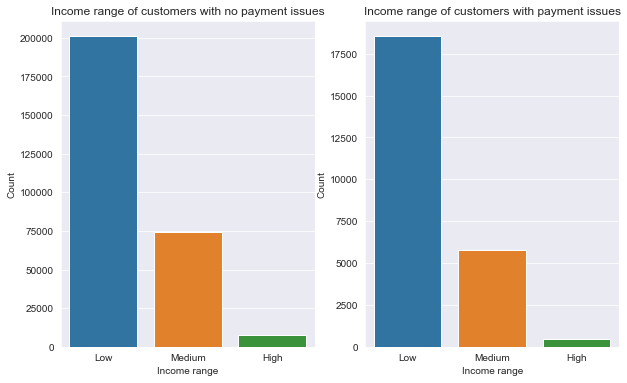

In [70]:
#Using own AMT_INCOME_TOTAL


plt.figure(figsize=[10,6])

sns.set_style("darkgrid")
plt.subplot(1,2,1)
sns.countplot(df0["Income_Range"])
plt.xlabel("Income range")
plt.ylabel("Count")
plt.title("Income range of customers with no payment issues")

plt.subplot(1,2,2)
sns.countplot(df1["Income_Range"])
plt.xlabel("Income range")
plt.ylabel("Count")
plt.title("Income range of customers with payment issues")

plt.show()

Most of the loan applicants have low to medium range incomes 

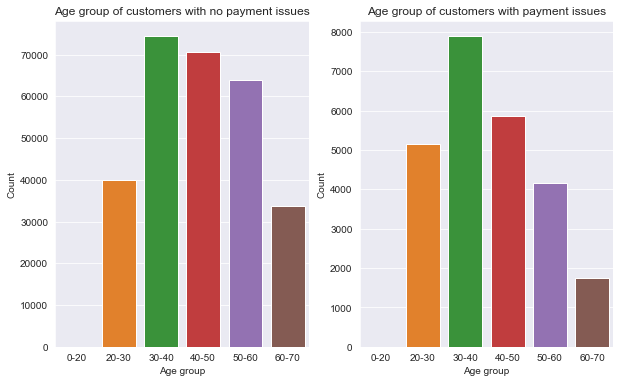

In [71]:
#Using own Age_Group

plt.figure(figsize=[10,6])

sns.set_style("darkgrid")
plt.subplot(1,2,1)
sns.countplot(df0["Age_Group"])
plt.xlabel("Age group")
plt.ylabel("Count")
plt.title("Age group of customers with no payment issues")

plt.subplot(1,2,2)
sns.countplot(df1["Age_Group"])
plt.xlabel("Age group")
plt.ylabel("Count")
plt.title("Age group of customers with payment issues")

plt.show()



Loans should be given to customers in the age group of 30-60, but mostly in age group of 30-50

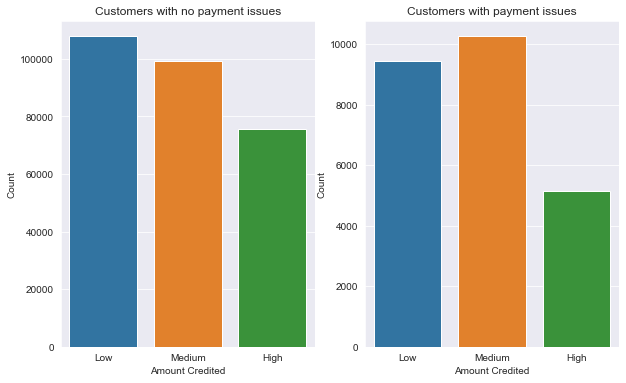

In [72]:
#Lets analyse amount credited column as it is an important metric

plt.figure(figsize=[10,6])

sns.set_style("darkgrid")
plt.subplot(1,2,1)
sns.countplot(df0["AMT_Credit_Range"])
plt.xlabel("Amount Credited")
plt.ylabel("Count")
plt.title("Customers with no payment issues")

plt.subplot(1,2,2)
sns.countplot(df1["AMT_Credit_Range"])
plt.xlabel("Amount Credited")
plt.ylabel("Count")
plt.title("Customers with payment issues")

plt.show()

It can be seen that customers with less credit are more likely to make payment .Also, after low credit ,
medium credit amount loans can be considered

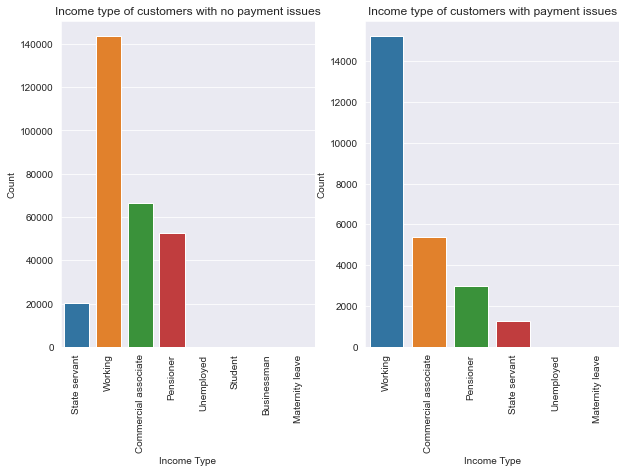

In [73]:
##Based on Income_Type i.e NAME_INCOME_TYPE

plt.figure(figsize=[10,6])

sns.set_style("darkgrid")
plt.subplot(1,2,1)
sns.countplot(df0["NAME_INCOME_TYPE"])
plt.xlabel("Income Type")
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.title("Income type of customers with no payment issues")

plt.subplot(1,2,2)
sns.countplot(df1["NAME_INCOME_TYPE"])
plt.xlabel("Income Type")
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.title("Income type of customers with payment issues")

plt.show()

As we can see the count of customers who are working professionals are more likely to repay the loan.
Also , customers working as State Servants, Commerical Associate's and Pensioner's can be considered.


In [74]:
#Saving the dataset again

appdata_new_frame.to_csv("FramedDataSetA.csv")

In [75]:
appdata_new_frame.shape

(307511, 31)

In [76]:
df0.to_csv("FramedDataSetA0.csv")

In [77]:
df1.to_csv("FramedDataSetA1.csv")

In [78]:
# Reimporting 

appdata_new_frame=pd.read_csv("FramedDataSetA.csv")
appdata_new_frame.drop("Unnamed: 0",axis=1,inplace=True)

In [79]:
df0=pd.read_csv("FramedDataSetA0.csv")
df0.drop("Unnamed: 0",axis=1,inplace=True)

In [80]:
df1=pd.read_csv("FramedDataSetA1.csv")
df1.drop("Unnamed: 0",axis=1,inplace=True)

In [81]:
df0["OCCUPATION_TYPE"].isnull().sum()

90113

In [82]:
print(appdata_new_frame.columns,end="")

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'Income_Range', 'AMT_Credit_Range', 'Age_Group'],
      dtype='object')

In [83]:
appdata_new_frame["NAME_HOUSING_TYPE"].isnull().sum()

0

In [84]:
appdata_new_frame.shape

(307511, 31)

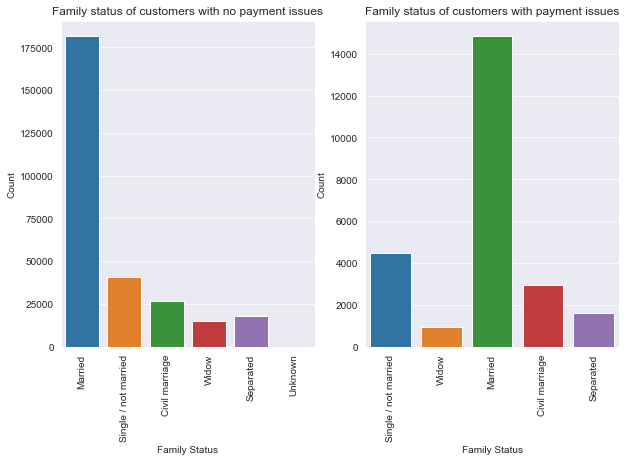

In [85]:
##Based on NAME_FAMILY_STATUS ,CODE_GENDER , NAME_HOUSING_TYPE

plt.figure(figsize=[10,6])

sns.set_style("darkgrid")
plt.subplot(1,2,1)
sns.countplot(df0["NAME_FAMILY_STATUS"])
plt.xlabel("Family Status")
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.title("Family status of customers with no payment issues")

plt.subplot(1,2,2)
sns.countplot(df1["NAME_FAMILY_STATUS"])
plt.xlabel("Family Status")
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.title("Family status of customers with payment issues")


plt.show()

Married people have paid the loans on time as compared to other sub categories

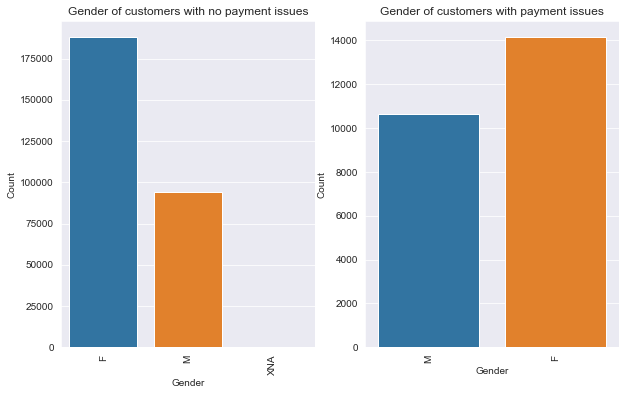

In [86]:
plt.figure(figsize=[10,6])


plt.subplot(1,2,1)
sns.countplot(df0["CODE_GENDER"])
plt.xlabel("Gender")
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.title("Gender of customers with no payment issues")

plt.subplot(1,2,2)
sns.countplot(df1["CODE_GENDER"])
plt.xlabel("Gender")
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.title("Gender of customers with payment issues")
plt.show()

Banks can target more female customers then male customers

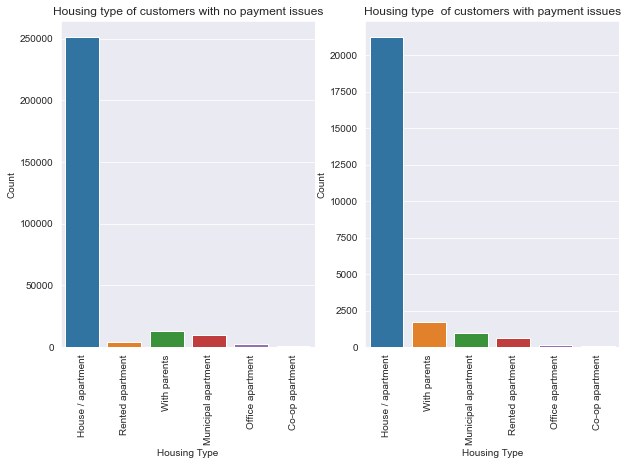

In [87]:
# NAME_HOUSING_TYPE


plt.figure(figsize=[10,6])

sns.set_style("darkgrid")
plt.subplot(1,2,1)
sns.countplot(df0["NAME_HOUSING_TYPE"])
plt.xlabel("Housing Type")
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.title("Housing type of customers with no payment issues")

plt.subplot(1,2,2)
sns.countplot(df1["NAME_HOUSING_TYPE"])
plt.xlabel("Housing Type")
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.title("Housing type  of customers with payment issues")


plt.show()

It can be seen that people with own houses can be targeted and also a small fraction of loan can be given to people 
living with their parents as there are chances that the parents already have their own house

In [88]:
#Bivariate Analysis

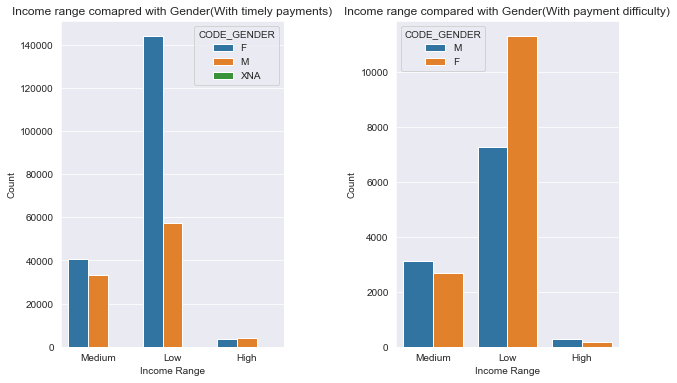

In [89]:
# Comparing income range and Gender

plt.figure(figsize=[10,6])
plt.subplots_adjust(wspace=0.5)
sns.set_style("darkgrid")
plt.subplot(1,2,1)
sns.countplot(x=df0["Income_Range"],hue=df0["CODE_GENDER"])
plt.xlabel("Income Range")
plt.ylabel("Count")
plt.title("Income range comapred with Gender(With timely payments)")

plt.subplot(1,2,2)
sns.countplot(x=df1["Income_Range"],hue=df1["CODE_GENDER"])
plt.xlabel("Income Range")
plt.ylabel("Count")
plt.title("Income range compared with Gender(With payment difficulty)")

plt.show()

Females with low income are likely to make timely payments and can be targetted.

In [90]:
## Income vs Credit

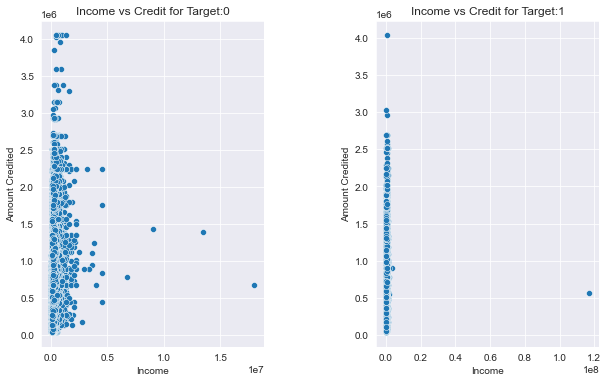

In [91]:
plt.figure(figsize=[10,6])
plt.subplots_adjust(wspace=0.5)
sns.set_style("darkgrid")
plt.subplot(1,2,1)
sns.scatterplot(x=df0["AMT_INCOME_TOTAL"],y=df0["AMT_CREDIT"])
plt.xlabel("Income")
plt.ylabel("Amount Credited")
plt.title("Income vs Credit for Target:0")

plt.subplot(1,2,2)
sns.scatterplot(x=df1["AMT_INCOME_TOTAL"],y=df1["AMT_CREDIT"])
plt.xlabel("Income")
plt.ylabel("Amount Credited")
plt.title("Income vs Credit for Target:1")
plt.show()

In [92]:
appdata_new_frame[["AMT_INCOME_TOTAL","AMT_CREDIT"]].corr()

,AMT_INCOME_TOTAL,AMT_CREDIT
AMT_INCOME_TOTAL,1.00000,0.15687
AMT_CREDIT,0.15687,1.00000


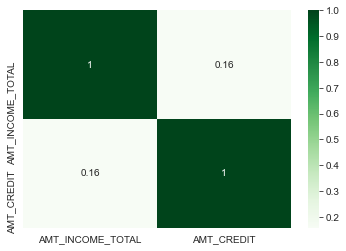

In [93]:
sns.heatmap(appdata_new_frame[["AMT_INCOME_TOTAL","AMT_CREDIT"]].corr(), cmap="Greens" , annot=True)
plt.show()

 There is not much of correlation between these two variables

In [94]:
##NAME_FAMILY_STATUS and NAME_EDUCATION_TYPE 

In [95]:
appdata_new_frame[["NAME_FAMILY_STATUS","NAME_EDUCATION_TYPE"]]

,NAME_FAMILY_STATUS,NAME_EDUCATION_TYPE
0,Single / not married,Secondary / secondary special
1,Married,Higher education
2,Single / not married,Secondary / secondary special
3,Civil marriage,Secondary / secondary special
4,Single / not married,Secondary / secondary special
...,...,...
307506,Separated,Secondary / secondary special
307507,Widow,Secondary / secondary special
307508,Separated,Higher education
307509,Married,Secondary / secondary special


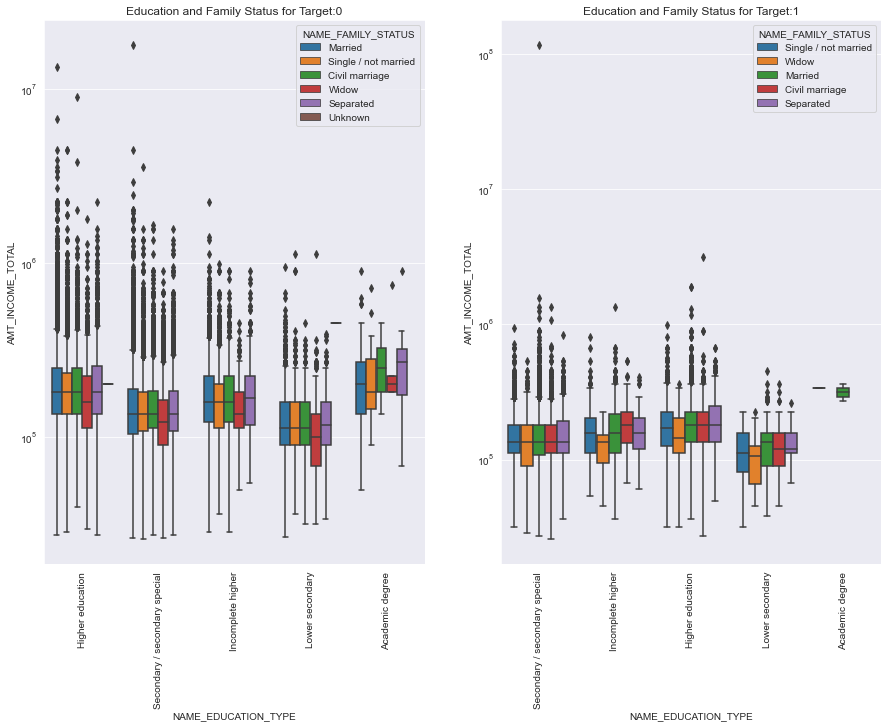

In [96]:
plt.figure(figsize=[15,10])

plt.subplot(1,2,1)
plt.yscale("log")
sns.boxplot(x=df0["NAME_EDUCATION_TYPE"], y=df0["AMT_INCOME_TOTAL"] ,hue=df0["NAME_FAMILY_STATUS"])
plt.title("Education and Family Status for Target:0")
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.yscale("log")
sns.boxplot(x=df1["NAME_EDUCATION_TYPE"], y=df1["AMT_INCOME_TOTAL"] ,hue=df1["NAME_FAMILY_STATUS"])
plt.title("Education and Family Status for Target:1")
plt.xticks(rotation=90)

plt.show()

1.People with higher education are most likely to make payments and in that married people can be moslty targeted

In [97]:
##Correlation

<AxesSubplot:>

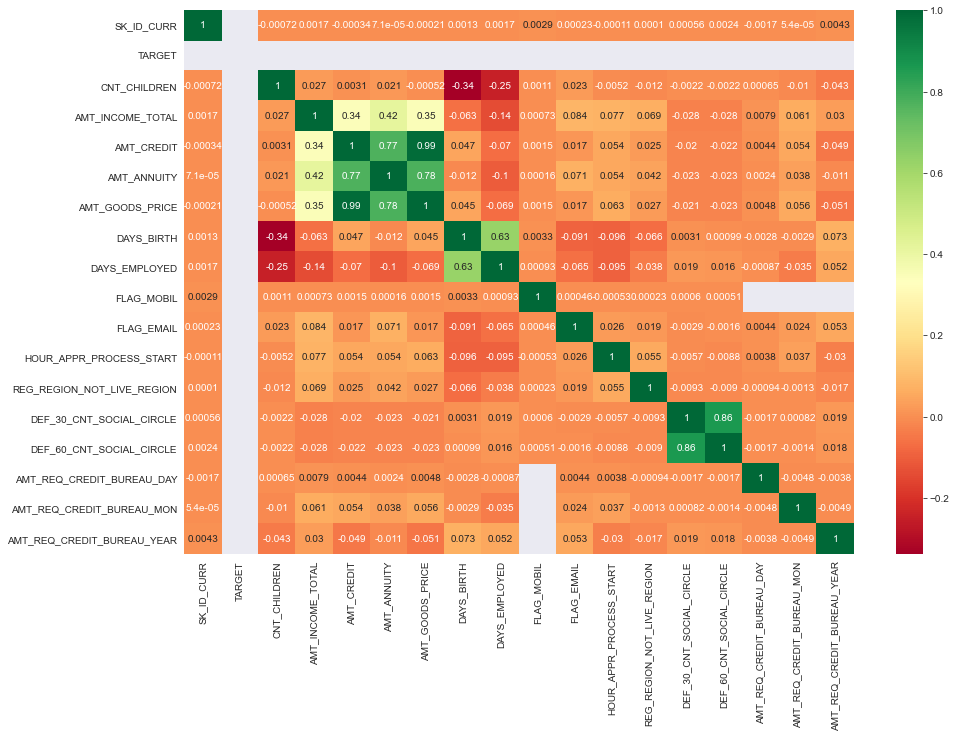

In [98]:
plt.figure(figsize=[15,10])
sns.heatmap(df0.corr() , cmap="RdYlGn" , annot=True)

From the above we can find out following:
1.AMT_CREDIT AND AMT_GOODS_PRICE are highly correlated
2.DEF_30_CNT_SOCIAL_CIRCLE and DEF_60_CNT_SOCIAL_CIRCLE have strong correlation.

<AxesSubplot:>

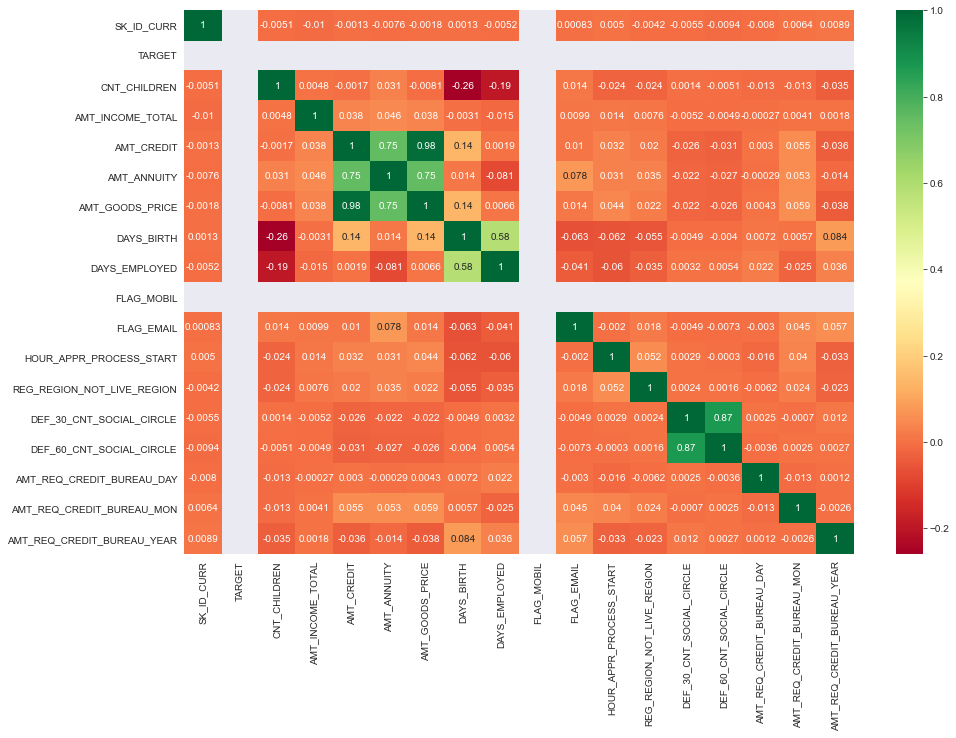

In [99]:
plt.figure(figsize=[15,10])
sns.heatmap(df1.corr() , cmap="RdYlGn" , annot=True)

Same observations can be seen here

In [100]:
df1.to_csv("FramedDataSetA1latest.csv")

In [101]:
prevapp = pd.read_csv("previous_application.csv")

In [102]:
prevapp.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [103]:
##To display all columns
pd.set_option('display.max_columns',None)
prevapp.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
prevapp.isnull().sum() / len(prevapp) * 100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [105]:
##Dropping columns RATE_INTEREST_PRIMARY, RATE_INTEREST_PRIVILEGED having 99.6% null values
prevapp=prevapp.drop(['RATE_INTEREST_PRIMARY','RATE_INTEREST_PRIVILEGED'],axis=1)

In [106]:
prevapp.shape

(1670214, 35)

In [107]:
#We see negative values in the columns starting with days, we will convert these columns to have positive values for our analysis
negcols = [cols for cols in prevapp if cols.startswith('DAYS')]
prevapp[negcols] = abs(prevapp[negcols])

In [108]:
prevapp.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,XAP,Approved,73.0,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,42.0,300.0,42.0,37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,XNA,Approved,164.0,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,XNA,Approved,301.0,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,XNA,Approved,512.0,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,482.0,152.0,182.0,177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,Repairs,Refused,781.0,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [109]:
prevapp['NAME_CONTRACT_STATUS'].value_counts()

Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64

##Univariate analysis on the Dataset

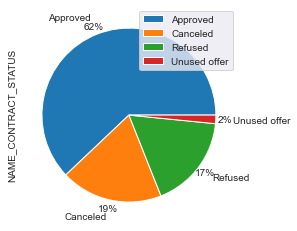

In [110]:
prevapp["NAME_CONTRACT_STATUS"].value_counts().plot.pie(autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)
plt.legend()


 Hence we observe that most of the loans fall under approved category

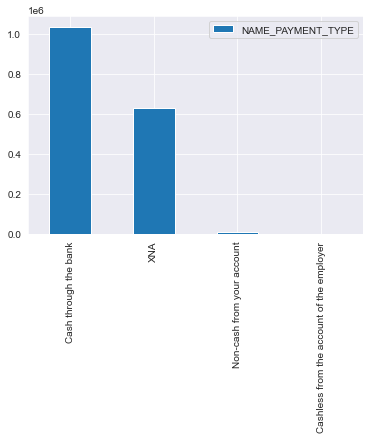

In [111]:
#mode of payment by customers in previous application
prevapp["NAME_PAYMENT_TYPE"].value_counts().plot.bar()
plt.legend()


In [112]:
#The XNA values must be replaced with the NAN values 
prevapp=prevapp.replace('XNA', np.NaN)

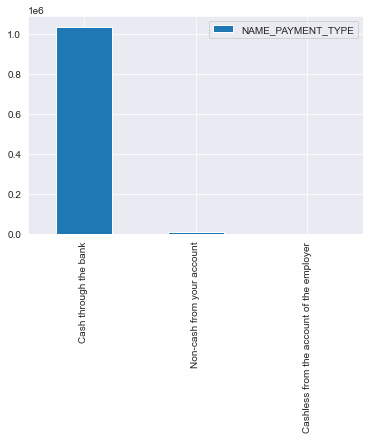

In [113]:
#After removing XNA values
prevapp["NAME_PAYMENT_TYPE"].value_counts().plot.bar()
plt.legend()


The most common payment type in previous application was cash through bank

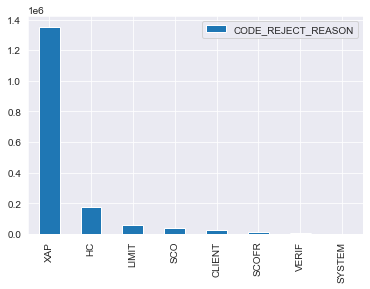

In [114]:
#It is important to understand the most common  reason of rejection of a loan
prevapp["CODE_REJECT_REASON"].value_counts().plot.bar()
plt.legend()


In [115]:
#The XAP values are interfering with our analysis hence it must be replaced with the NAN values 
prevapp=prevapp.replace('XAP', np.NaN)

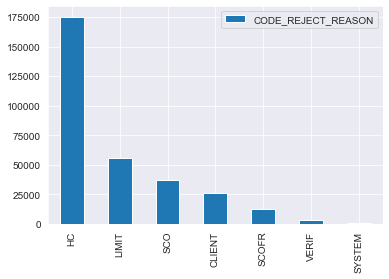

In [116]:
#After removing XNA values
prevapp["CODE_REJECT_REASON"].value_counts().plot.bar()
plt.legend()

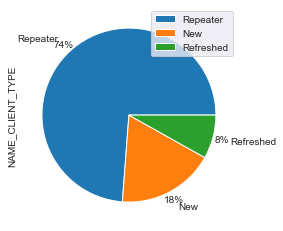

In [117]:
#To observe the type of a customer we can check whether the borrower is a new cust or repeater
prevapp["NAME_CLIENT_TYPE"].value_counts().plot.pie(autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)
plt.legend()


--We see that majority of the application indicated they are repeaters and have applied for loan before this

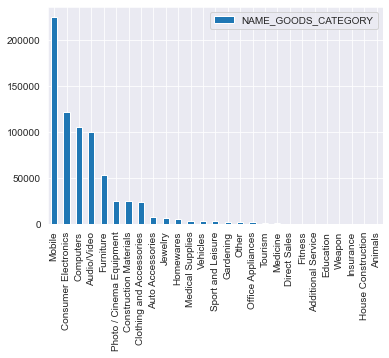

In [118]:
##To check the type of goods that required loan in the previous application
prevapp["NAME_GOODS_CATEGORY"].value_counts().plot.bar()
plt.legend()

--Clearly a very good number of people took loan to buy mobile phones

##Finding the outliers

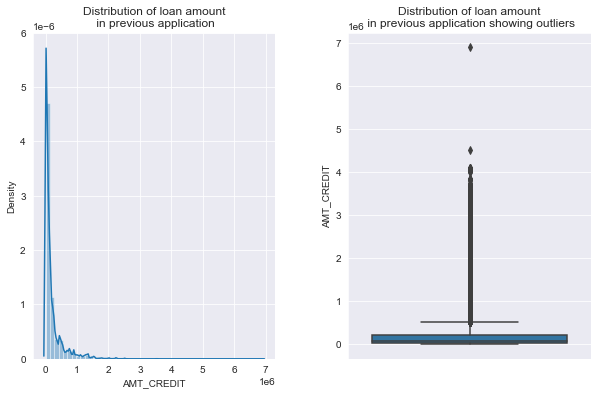

In [119]:
plt.figure(figsize=[10,6])
plt.subplots_adjust(wspace = 0.3)
plt.subplot(1,2,1)
sns.distplot(prevapp["AMT_CREDIT"])
plt.title("Distribution of loan amount\n in previous application")


plt.subplot(1,2,2)

sns.boxplot(y=prevapp["AMT_CREDIT"])
plt.title("Distribution of loan amount\n in previous application showing outliers")
plt.show()

<Figure size 720x432 with 0 Axes>

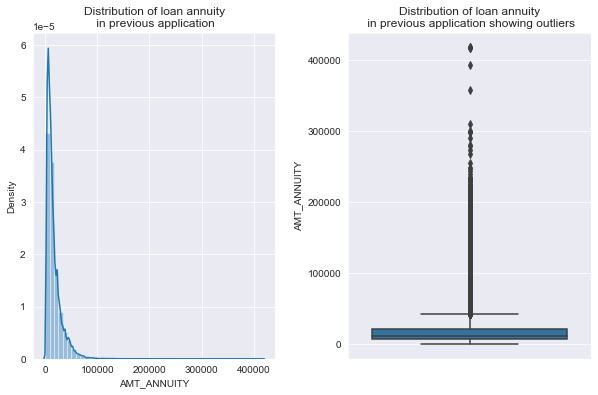

In [120]:
plt.figure(figsize=[10,6])

plt.figure(figsize=[10,6])
plt.subplots_adjust(wspace = 0.3)
plt.subplot(1,2,1)
sns.distplot(prevapp["AMT_ANNUITY"])
plt.title("Distribution of loan annuity\n in previous application")


plt.subplot(1,2,2)

sns.boxplot(y=prevapp["AMT_ANNUITY"])
plt.title("Distribution of loan annuity\n in previous application showing outliers")
plt.show()


<Figure size 720x432 with 0 Axes>

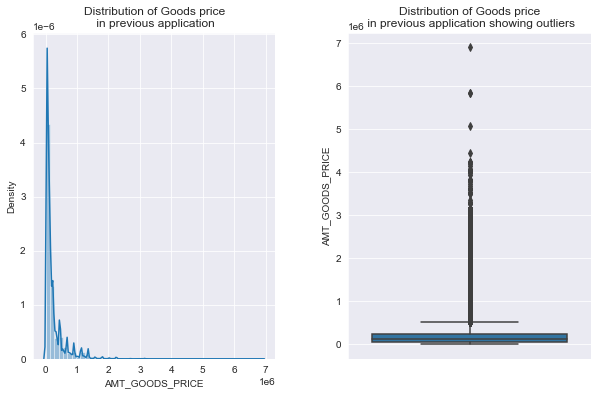

In [121]:
plt.figure(figsize=[10,6])

plt.figure(figsize=[10,6])
plt.subplots_adjust(wspace = 0.3)
plt.subplot(1,2,1)
sns.distplot(prevapp["AMT_GOODS_PRICE"])
plt.title("Distribution of Goods price\n in previous application")


plt.subplot(1,2,2)

sns.boxplot(y=prevapp["AMT_GOODS_PRICE"])
plt.title("Distribution of Goods price\n in previous application showing outliers")
plt.show()


Observation: All the above columns have outliers, as the distribution doesnot tend to be a normal distribution

Multivariate analysis

In [122]:
approved=prevapp[prevapp.NAME_CONTRACT_STATUS=='Approved']
refused=prevapp[prevapp.NAME_CONTRACT_STATUS=='Refused']
canceled=prevapp[prevapp.NAME_CONTRACT_STATUS=='Canceled']
unused=prevapp[prevapp.NAME_CONTRACT_STATUS=='Unused Offer']


In [123]:
def displayanalysis(var, label_rotation,horizontal_layout):
    if(horizontal_layout):
        fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15,5))
    else:
        fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(15,30))
    
    s1=sns.countplot(ax=ax1,x=refused[var], data=refused, order= refused[var].value_counts().index,)
    ax1.set_title("Refused", fontsize=10)
    ax1.set_xlabel('%s' %var)
    ax1.set_ylabel("Count of Loans")
    if(label_rotation):
        s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
    
    s2=sns.countplot(ax=ax2,x=approved[var], data=approved, order= approved[var].value_counts().index,)
    if(label_rotation):
        s2.set_xticklabels(s2.get_xticklabels(),rotation=90)
    ax2.set_xlabel('%s' %var)
    ax2.set_ylabel("Count of Loans")
    ax2.set_title("Approved", fontsize=10)
    
    
    s3=sns.countplot(ax=ax3,x=canceled[var], data=canceled, order= canceled[var].value_counts().index,)
    ax3.set_title("Canceled", fontsize=10)
    ax3.set_xlabel('%s' %var)
    ax3.set_ylabel("Count of Loans")
    if(label_rotation):
        s3.set_xticklabels(s3.get_xticklabels(),rotation=90)
    plt.show()

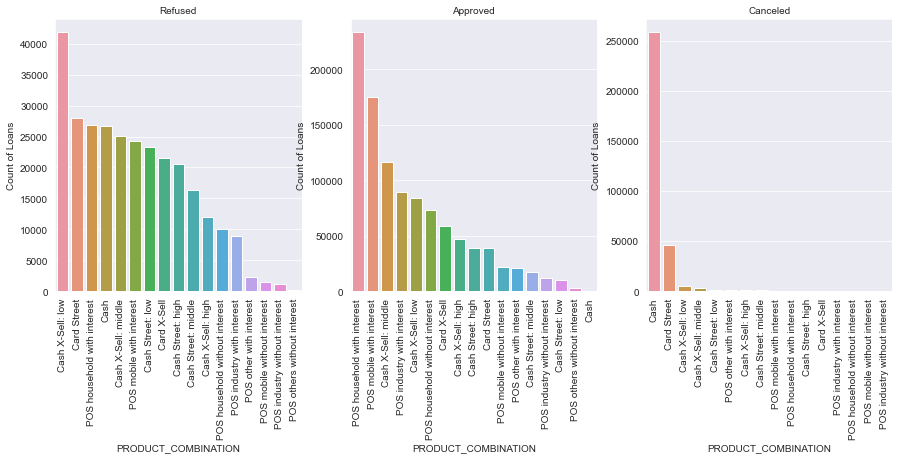

In [124]:
displayanalysis('PRODUCT_COMBINATION', label_rotation=True,horizontal_layout=True)

Observation:We observe most number of loans were approved for POS household with interest.
Most number of refused loans were of Cash X-Sell: Low Product combination
Most Canceled loans were Cash loans

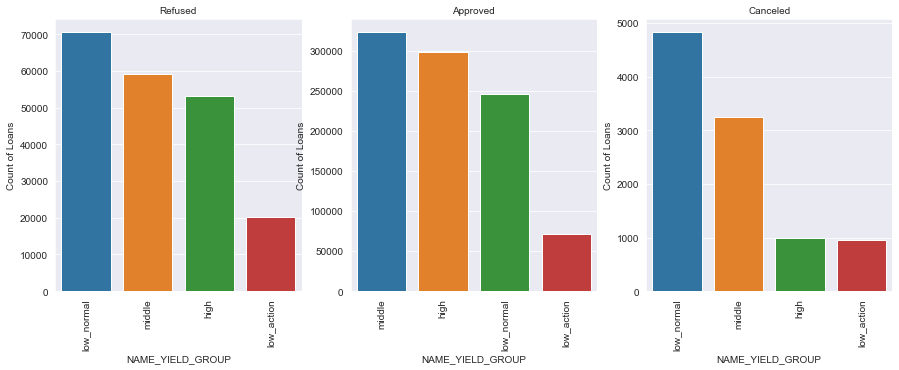

In [125]:
displayanalysis('NAME_YIELD_GROUP', label_rotation=True,horizontal_layout=True)

Observation:Most approved loans were from Middle Yield Group
Most refused loans were from Yield Groups Not specified

In [126]:
##Any other

<AxesSubplot:xlabel='NAME_CLIENT_TYPE', ylabel='count'>

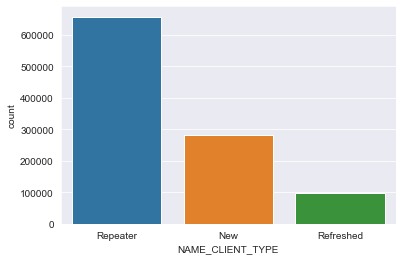

In [127]:
##Distribution of type of clients and their loan being approved
sns.countplot(x=approved['NAME_CLIENT_TYPE'], data=prevapp)

<AxesSubplot:xlabel='NAME_CLIENT_TYPE', ylabel='count'>

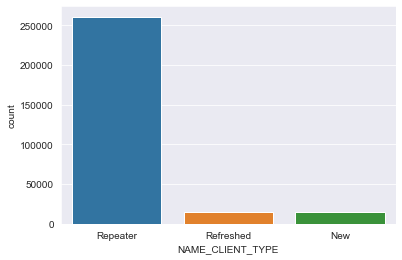

In [128]:
##Distribution of type of clients and their loan being refused
sns.countplot(x=refused['NAME_CLIENT_TYPE'], data=prevapp)

--Hence we see that number of repeated clients are more in both approved and rejected are way more than the other two client type this can be due to large number of applications from the repeated clients
--Whereas number of new applicants whose loan is approved is considerably more than the number of refreshed clients whose loan is approved

#Bivariate analysis
#Finding out correlation of loans being approved 

In [129]:
new_approved=['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'DAYS_TERMINATION', 'DAYS_FIRST_DUE', 'AMT_GOODS_PRICE', 'AMT_ANNUITY', 'CNT_PAYMENT', 'AMT_CREDIT', 'AMT_APPLICATION']
approved_analysis=approved[new_approved]

In [130]:
correlation_approved = approved_analysis.corr()

In [131]:
correlation_approved

,AMT_DOWN_PAYMENT,RATE_DOWN_PAYMENT,DAYS_TERMINATION,DAYS_FIRST_DUE,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_PAYMENT,AMT_CREDIT,AMT_APPLICATION
AMT_DOWN_PAYMENT,1.000000,0.502704,-0.030544,-0.012638,0.459238,0.257858,0.005748,0.266721,0.459238
RATE_DOWN_PAYMENT,0.502704,1.000000,-0.142934,-0.030283,-0.088864,-0.105081,-0.287845,-0.216551,-0.088864
DAYS_TERMINATION,-0.030544,-0.142934,1.000000,0.315712,0.207092,0.065780,0.053454,0.212177,0.146623
DAYS_FIRST_DUE,-0.012638,-0.030283,0.315712,1.000000,-0.027262,-0.059027,-0.209351,-0.002888,-0.055209
AMT_GOODS_PRICE,0.459238,-0.088864,0.207092,-0.027262,1.000000,0.830859,0.635505,0.993244,1.000000
AMT_ANNUITY,0.257858,-0.105081,0.065780,-0.059027,0.830859,1.000000,0.344142,0.826005,0.814343
CNT_PAYMENT,0.005748,-0.287845,0.053454,-0.209351,0.635505,0.344142,1.000000,0.626292,0.645581
AMT_CREDIT,0.266721,-0.216551,0.212177,-0.002888,0.993244,0.826005,0.626292,1.000000,0.961757
AMT_APPLICATION,0.459238,-0.088864,0.146623,-0.055209,1.000000,0.814343,0.645581,0.961757,1.000000


In [132]:
#Rounding the correlation upto 2 digits
round(correlation_approved,2)

,AMT_DOWN_PAYMENT,RATE_DOWN_PAYMENT,DAYS_TERMINATION,DAYS_FIRST_DUE,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_PAYMENT,AMT_CREDIT,AMT_APPLICATION
AMT_DOWN_PAYMENT,1.00,0.50,-0.03,-0.01,0.46,0.26,0.01,0.27,0.46
RATE_DOWN_PAYMENT,0.50,1.00,-0.14,-0.03,-0.09,-0.11,-0.29,-0.22,-0.09
DAYS_TERMINATION,-0.03,-0.14,1.00,0.32,0.21,0.07,0.05,0.21,0.15
DAYS_FIRST_DUE,-0.01,-0.03,0.32,1.00,-0.03,-0.06,-0.21,-0.00,-0.06
AMT_GOODS_PRICE,0.46,-0.09,0.21,-0.03,1.00,0.83,0.64,0.99,1.00
AMT_ANNUITY,0.26,-0.11,0.07,-0.06,0.83,1.00,0.34,0.83,0.81
CNT_PAYMENT,0.01,-0.29,0.05,-0.21,0.64,0.34,1.00,0.63,0.65
AMT_CREDIT,0.27,-0.22,0.21,-0.00,0.99,0.83,0.63,1.00,0.96
AMT_APPLICATION,0.46,-0.09,0.15,-0.06,1.00,0.81,0.65,0.96,1.00


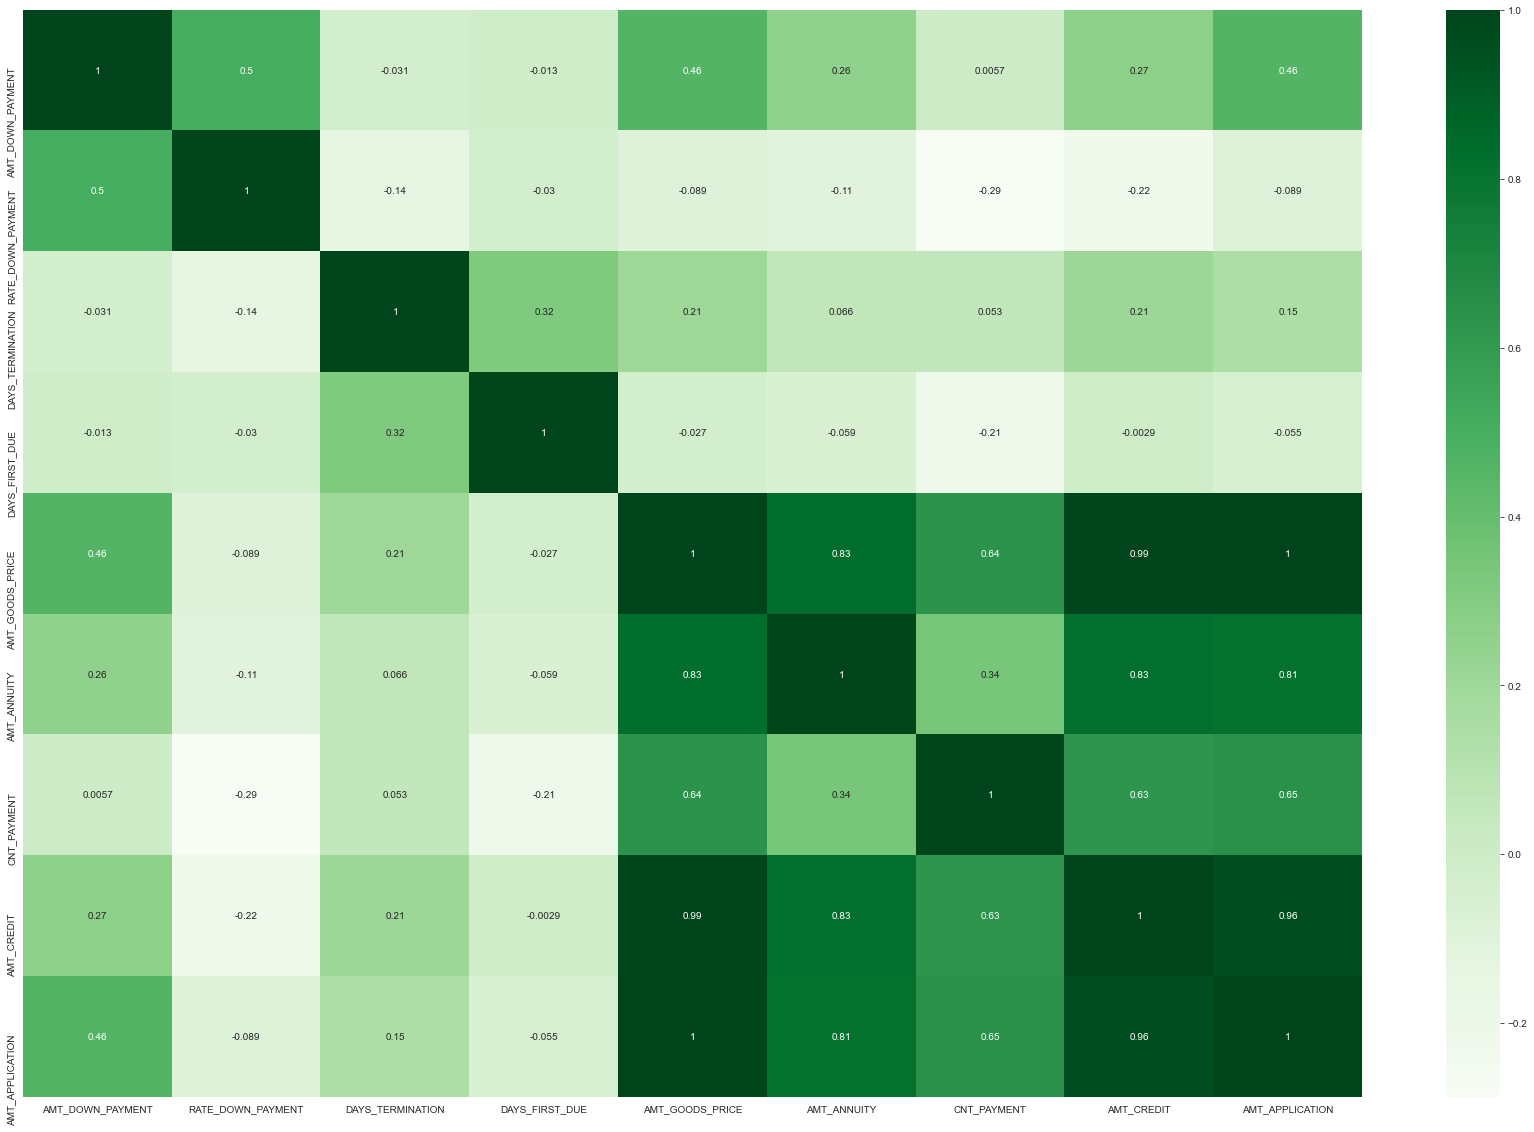

In [133]:
plt.figure(figsize=(30,20))
sns.heatmap(correlation_approved, cmap="Greens", annot=True)
plt.show()

Inference:
    1)Top 3 positive correlation:
         a)AMT_CREDIT v/s AMT_GOODS_PRICE
         b)AMT_CREDIT v/s AMT_APPLICATION
         c)AMT_GOODS_PRICE v/s AMT_ANNUITY
    2)Top 3 negative correlation:
        a)CNT_PAYMENT v/s RATE_DOWN_PAYMENT
        b)AMT_CREDIT v/s RATE_DOWN_PAYMENT
        c)CNT_PAYMENT v/s DAYS_FIRST_DUE

In [134]:
#Finding out correlation of loans being refused
new_refused=['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'AMT_ANNUITY', 'CNT_PAYMENT', 'AMT_CREDIT', 'DAYS_DECISION', 'AMT_APPLICATION']
refused_analysis=refused[new_refused]

In [135]:
correlation_refused = refused_analysis.corr()
round(correlation_refused,2)

,AMT_DOWN_PAYMENT,RATE_DOWN_PAYMENT,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_PAYMENT,AMT_CREDIT,DAYS_DECISION,AMT_APPLICATION
AMT_DOWN_PAYMENT,1.00,0.42,0.54,0.32,0.09,0.39,-0.01,0.54
RATE_DOWN_PAYMENT,0.42,1.00,-0.02,-0.08,-0.24,-0.11,0.22,-0.02
AMT_GOODS_PRICE,0.54,-0.02,1.00,0.82,0.66,0.99,-0.33,1.00
AMT_ANNUITY,0.32,-0.08,0.82,1.00,0.43,0.82,-0.29,0.82
CNT_PAYMENT,0.09,-0.24,0.66,0.43,1.00,0.68,-0.31,0.67
AMT_CREDIT,0.39,-0.11,0.99,0.82,0.68,1.00,-0.27,0.98
DAYS_DECISION,-0.01,0.22,-0.33,-0.29,-0.31,-0.27,1.00,-0.26
AMT_APPLICATION,0.54,-0.02,1.00,0.82,0.67,0.98,-0.26,1.00


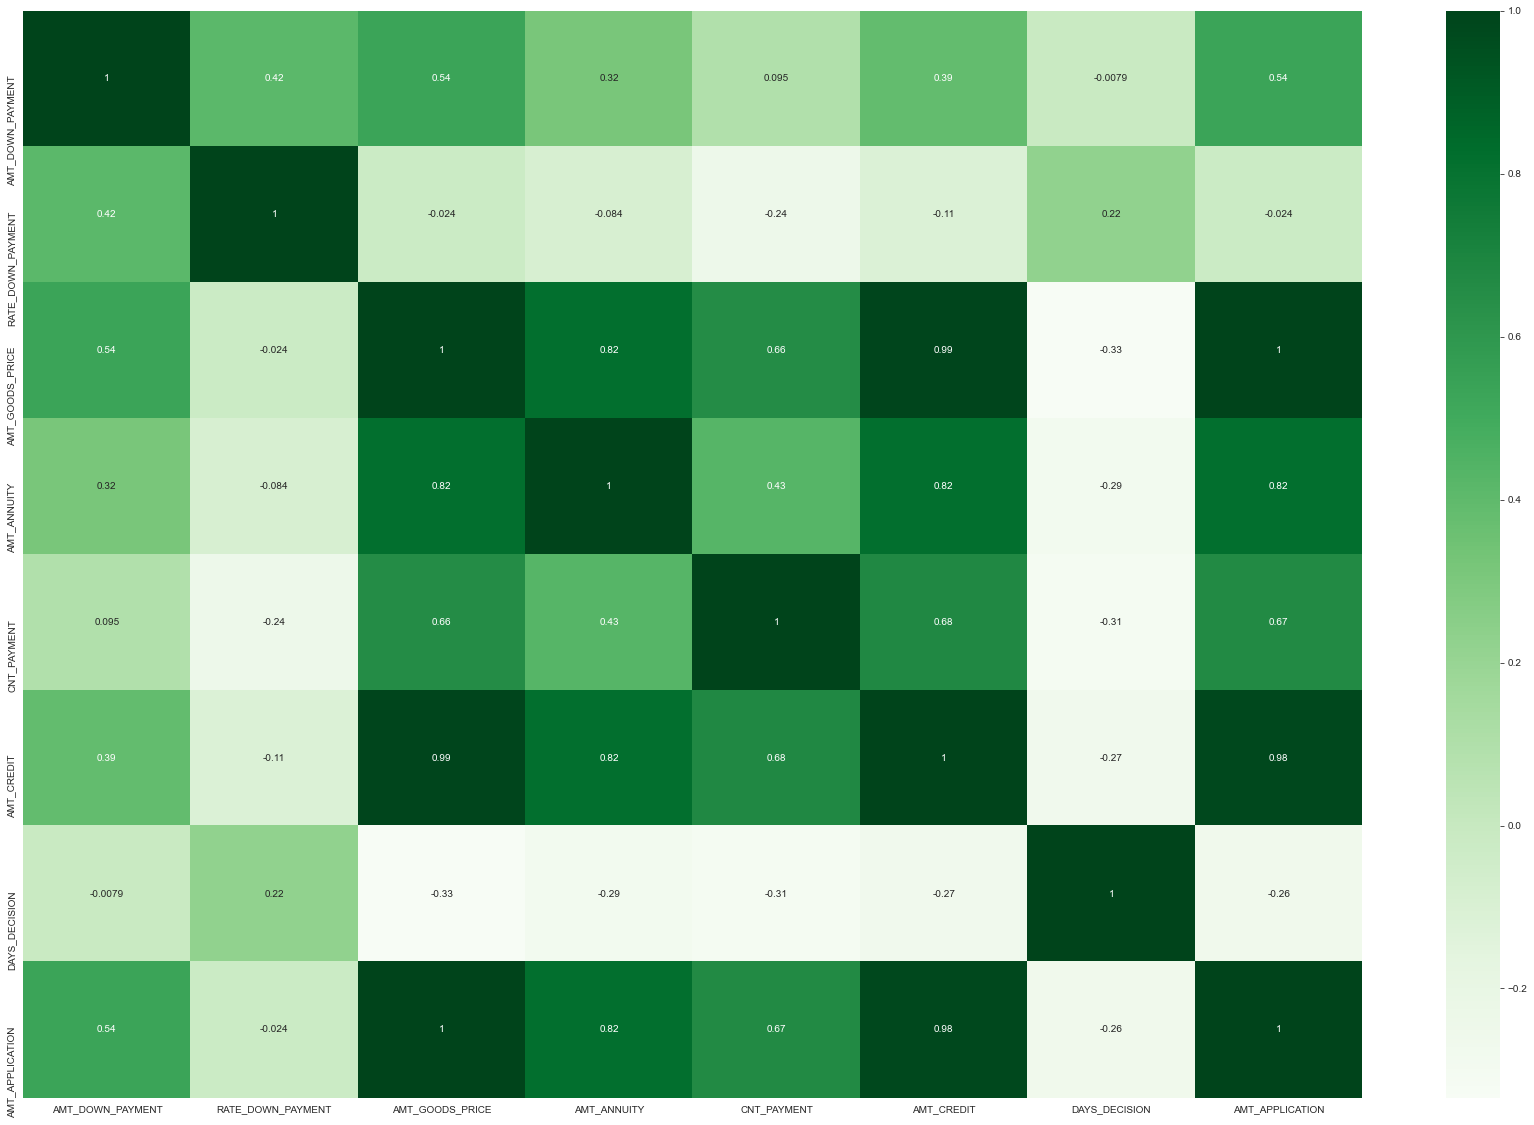

In [136]:
plt.figure(figsize=(30,20))
sns.heatmap(correlation_refused, cmap="Greens", annot=True)
plt.show()

nference:
    1)Top 3 positive correlation:
         a)AMT_CREDIT v/s AMT_GOODS_PRICE
         b)AMT_CREDIT v/s AMT_APPLICATION
         c)AMT_CREDIT v/s AMT_ANNUITY
    2)Top 3 negative correlation:
        a)AMT_GOODS_PRICE v/s DAYS_DECISION
        b)AMT_CREDIT v/s DAYS_DECISION
        c)CNT_PAYMENT v/s DAYS_DECISION

#Analysis on combination of current application and previous application
# merging application and previous application data on 'SK_ID_CURR'

In [137]:
merged_data = appdata_new_frame.merge(prevapp,on='SK_ID_CURR', how='inner')

In [138]:
merged_data.shape

(1413701, 65)

Text(0.5, 1.0, 'Distribution of contract status\n in merged data')

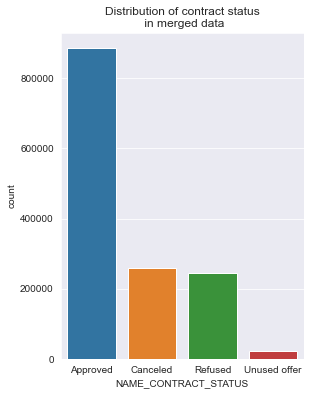

In [139]:
plt.figure(figsize=[10,6])
plt.subplots_adjust(wspace = 0.3)
plt.subplot(1,2,1)
sns.countplot(merged_data["NAME_CONTRACT_STATUS"])
plt.title("Distribution of contract status\n in merged data")



In [140]:
#Dividing the datset based on the defaulters and non-defaulters
nondefaulters = merged_data[merged_data['TARGET']==0] 
defaulters = merged_data[merged_data['TARGET']==1] 

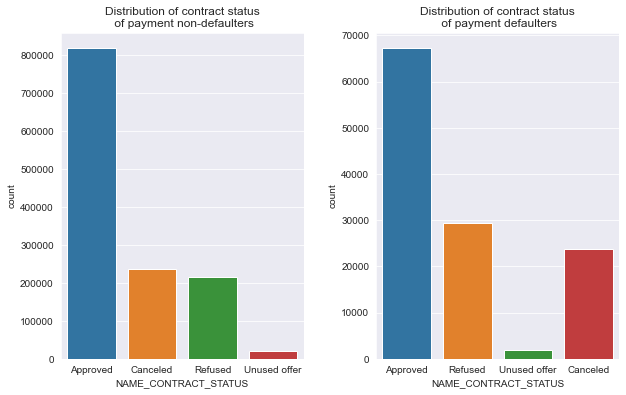

In [141]:
plt.figure(figsize=[10,6])
plt.subplots_adjust(wspace = 0.3)
plt.subplot(1,2,1)
sns.countplot(nondefaulters["NAME_CONTRACT_STATUS"])
plt.title("Distribution of contract status\n of payment non-defaulters")

plt.subplot(1,2,2)

sns.countplot(defaulters["NAME_CONTRACT_STATUS"])
plt.title("Distribution of contract status\n of payment defaulters")
plt.show()


Inference:
    A good number of people were approved for a loan and defaulted

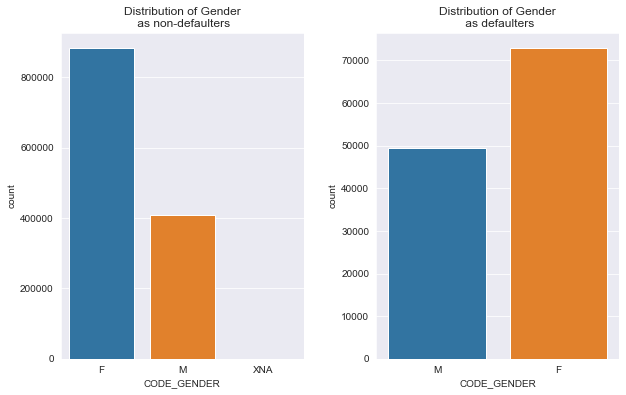

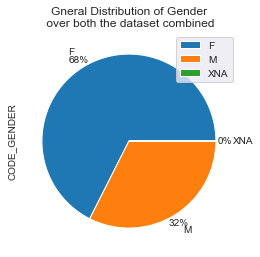

In [142]:
plt.figure(figsize=[10,6])
plt.subplots_adjust(wspace = 0.3)
plt.subplot(1,2,1)
sns.countplot(nondefaulters["CODE_GENDER"])
plt.title("Distribution of Gender\n as non-defaulters")

plt.subplot(1,2,2)

sns.countplot(defaulters["CODE_GENDER"])
plt.title("Distribution of Gender\n as defaulters")
plt.show()


merged_data["CODE_GENDER"].value_counts().plot.pie(autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)
plt.title("Gneral Distribution of Gender\n over both the dataset combined")
plt.legend()


Observation: Banks should mostly target female customers

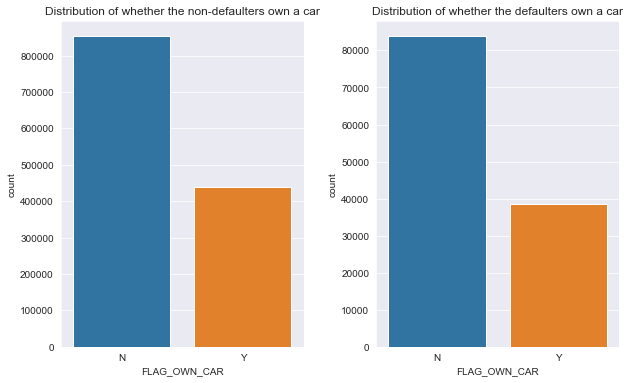

In [143]:
plt.figure(figsize=[10,6])
plt.subplots_adjust(wspace = 0.3)
plt.subplot(1,2,1)
sns.countplot(nondefaulters["FLAG_OWN_CAR"])
plt.title("Distribution of whether the non-defaulters own a car")

plt.subplot(1,2,2)

sns.countplot(defaulters["FLAG_OWN_CAR"])
plt.title("Distribution of whether the defaulters own a car")
plt.show()


Observation:Banks should target people those who dont own a car to avoid likely defaulters

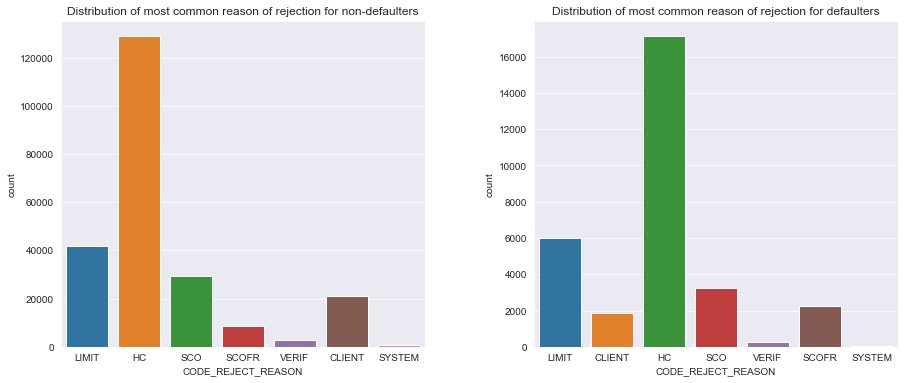

In [144]:

plt.figure(figsize=[15,6])
plt.subplots_adjust(wspace = 0.3)
plt.subplot(1,2,1)
sns.countplot(nondefaulters["CODE_REJECT_REASON"])
plt.title("Distribution of most common reason of rejection for non-defaulters")

plt.subplot(1,2,2)

sns.countplot(defaulters["CODE_REJECT_REASON"])
plt.title("Distribution of most common reason of rejection for defaulters")
plt.show()


Observation:Common code rejection reason is HC in both defaulters and non defaulters

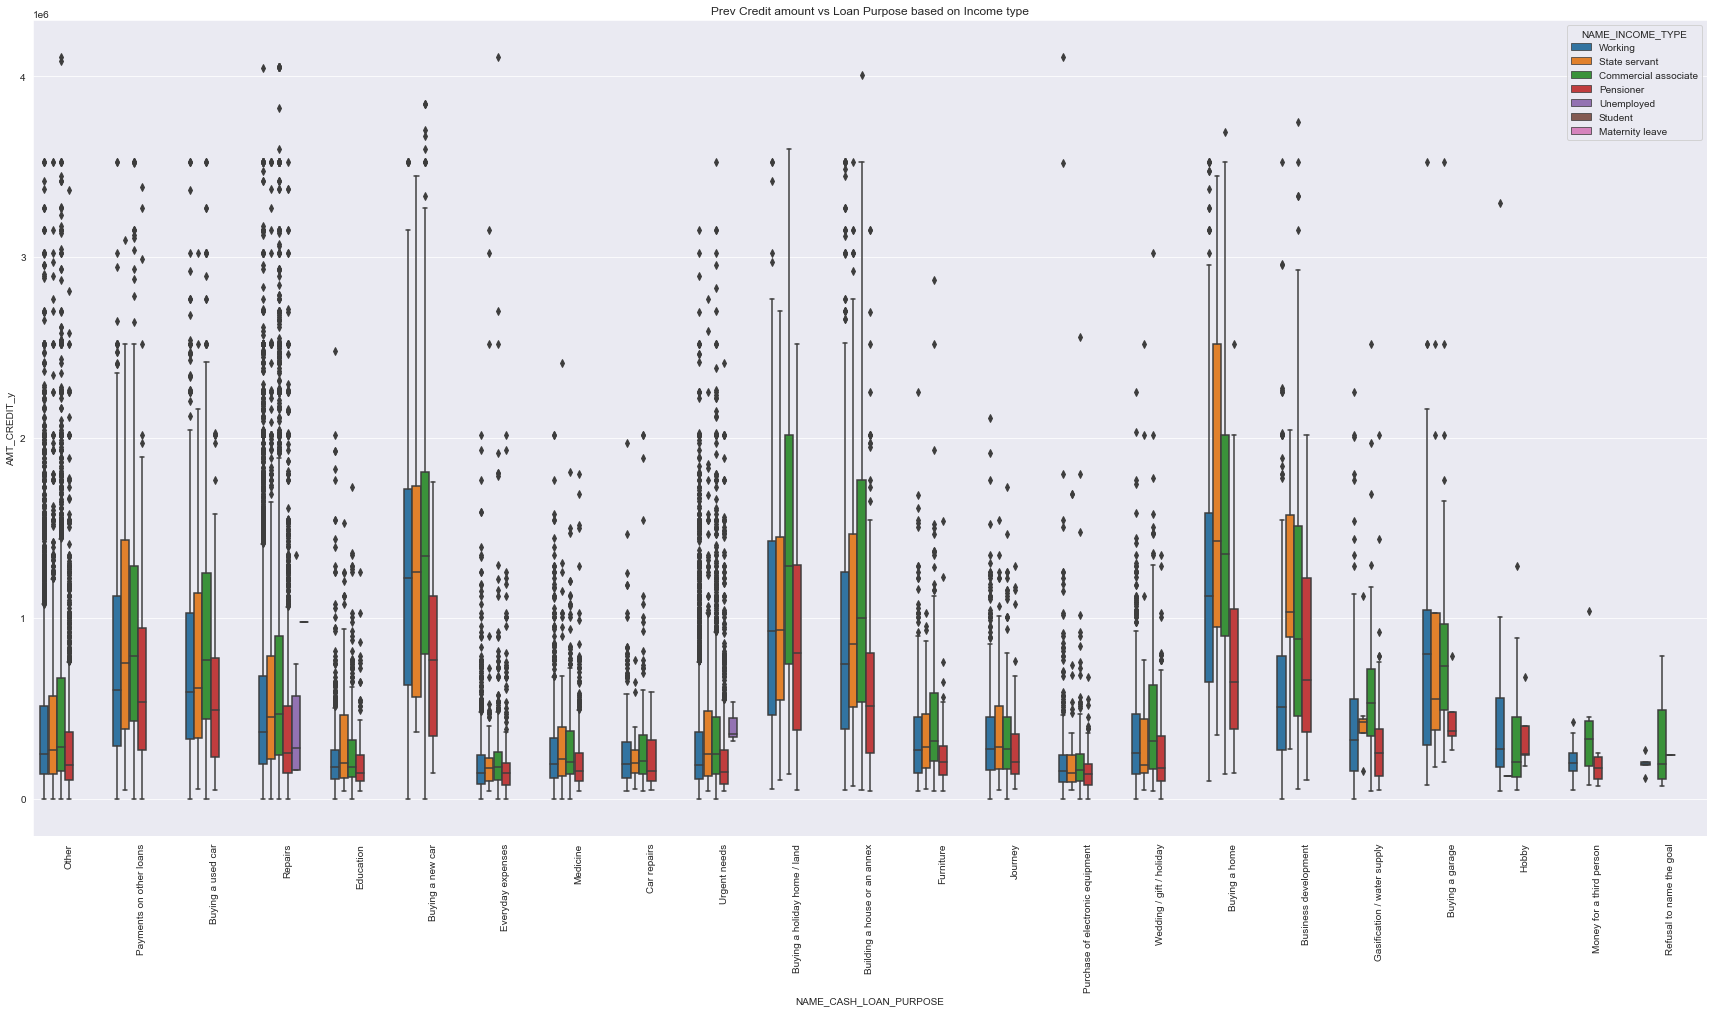

In [146]:
plt.figure(figsize=[30,15])
sns.boxplot(data=merged_data, x='NAME_CASH_LOAN_PURPOSE',hue='NAME_INCOME_TYPE',y='AMT_CREDIT_y')
plt.title('Prev Credit amount vs Loan Purpose based on Income type')
plt.xticks(rotation=90)
plt.show()

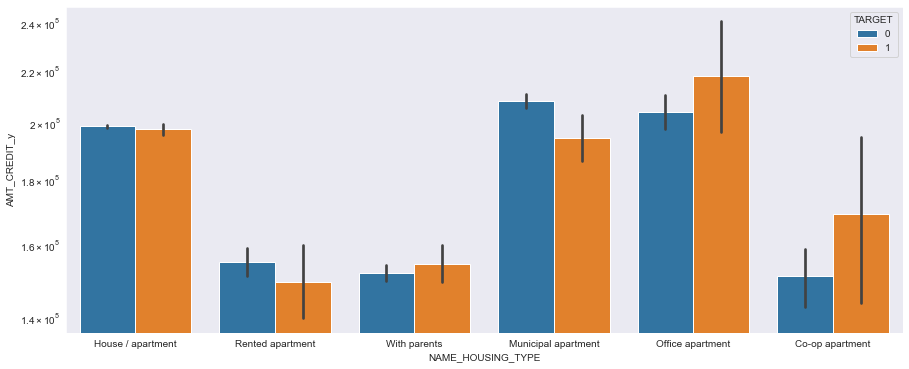

In [147]:
plt.figure(figsize=[15,6])
plt.yscale("log")
sns.barplot(y=merged_data['AMT_CREDIT_y'],x=merged_data["NAME_HOUSING_TYPE"],hue=merged_data["TARGET"])
plt.show()

Both the data in AMT credit columns present in Application data set and previous dataset suggest that , customers
living with parents ,living in Office apratment should be target more and given loans whereas those liveing in Co-op apartments 
shoudl be targeted less as they have payment diificulties.
